aer_simulator_statevector


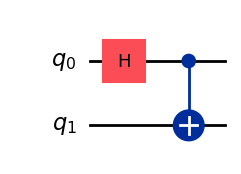

In [13]:
import numpy as np

from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, QuantumRegister,transpile

from IPython.display import Math
from qc_workbook.show_state import statevector_expr

from qiskit.visualization import *

#########################################################################
#
#
def get_statevector_array(circuit):
    circuit = circuit.copy()
    circuit.save_statevector()
    circuit = transpile(circuit, backend=simulator)
    job = simulator.run(circuit)
    result = job.result()
    qiskit_statevector = result.data()['statevector']

    return np.asarray(qiskit_statevector), result

#########################################################################
#
#
simulator = AerSimulator(method='statevector')
print(simulator.name)

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0,1)

circuit.draw('mpl')


In [14]:
#circuit.measure_all()

<class 'numpy.ndarray'> complex128
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


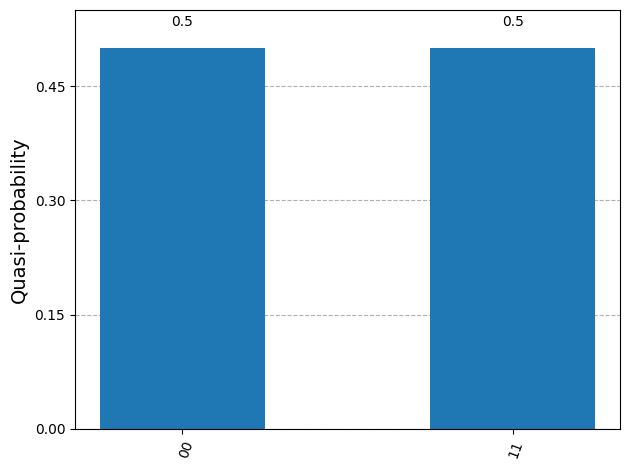

In [15]:
statevector, result = get_statevector_array(circuit)
print(type(statevector), statevector.dtype)
print(statevector)

expr = statevector_expr(statevector)
Math(expr)

plot_histogram(result.get_counts(circuit))

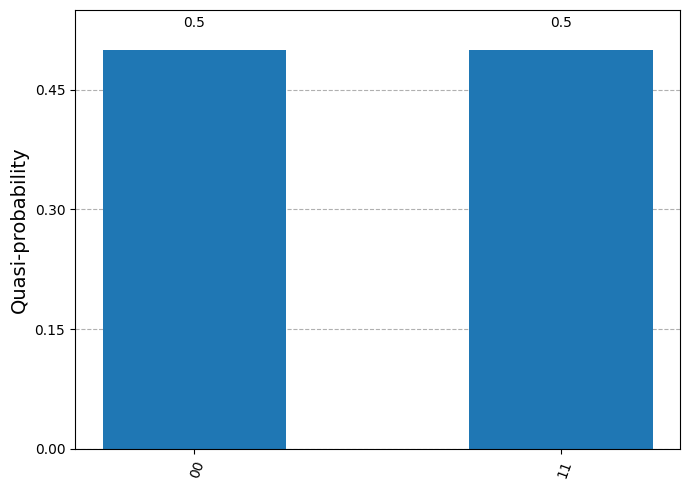

In [16]:
plot_distribution(result.get_counts(circuit))